<a href="https://colab.research.google.com/github/eriksali/DNN_2023_NLP/blob/main/hw1_nlp_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Retrieve online reviews with Selenium WebDriver
'''

# install chromium, its driver, and selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

dirpath = '/content/reviews_great_wall/'


import csv
import time
from selenium import webdriver
from selenium.webdriver.common.by import By

# Prepare CSV file
csvFile = open("reviews_yellow_mountain_acient_street.csv", "w", newline='', encoding="utf-8")
csvWriter.writerow(['Date','Title','Review'])
num_page = 99



from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.webdriver.chrome.options import Options
from time import sleep


from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("--disable-notifications")
# open it, go to a website, and get results
driver = webdriver.Chrome('chromedriver',options=options) ## need update

from selenium import webdriver
from selenium.common.exceptions import TimeoutException


try:
    driver.set_page_load_timeout(1000)
    driver.get("https://www.tripadvisor.com/Attraction_Review-g303685-d550738-Reviews-Mt_Huangshan-Huangshan_Anhui.html")

except TimeoutException as ex:
    isrunning = 0
    print("Exception has been thrown. " + str(ex))
    driver.close()

wait = WebDriverWait(driver, 20)
showmore_link_ = wait.until(EC.element_to_be_clickable((By.XPATH, "//*[contains(@data-smoke-attr, 'pagination-next-arrow')]")))


def save_body_to_file(destination_path, filename, body):

    with open(destination_path  + filename, 'w') as file:
        file.write(body)
    file.close()

# change the value inside the range to save more or less reviews
for i in range(0, num_page):

    # expand the review 
    time.sleep(2)

    driver.find_elements(By.XPATH, "//span[@class='lszDU']")

    container = driver.find_elements(By.XPATH, "//div[@data-automation='reviewCard']")

    dates = driver.find_elements(By.XPATH, ".//div[@class='biGQs _P pZUbB ncFvv osNWb']")

    for j in range(len(container)):

        title = container[j].find_element(By.XPATH, ".//div[@class='biGQs _P fiohW qWPrE ncFvv fOtGX']//span[@class='yCeTE']").text
        review = container[j].find_element(By.XPATH, ".//div[1]/div/span[@class='yCeTE']").text.replace("\n", "")
        date = " ".join(dates[j].text.split(" ")[-2:])

        title = title.replace('"','')

        exclude = '//'
        title = ''.join(ch for ch in title if ch not in exclude)

        csvWriter.writerow([date, title, review]) 

        filename = title + '_' + date + '_'  + ".txt"

        save_body_to_file(dirpath, filename, review)
        

driver.quit()



In [ ]:

## Save data to .txt files in a folder with each for one review text.


import pandas as pd

df = pd.read_csv("/content/reviews_6126_labels.csv")


!mkdir reviews_dataset

i = 1

for title in df.Title.unique():
## for title in df.Title:
    
    exclude = '//'
    title = ''.join(ch for ch in title if ch not in exclude) 
    fileName = "/content/reviews_dataset/" + str(i) + "_" + title +".txt"
    file = open(fileName, "w+") #creating a txt file if not already exists
    
    #adding rows for each unique title name 
    for row in df[df.Title==title].values:
        file.write(f"{row[2]}") #writing to txt file
    
    i += 1

!zip -r reviews_dataset.zip reviews_dataset/  

In [5]:
!pip install gensim
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.8 MB/s eta 0:00:00


unzip:  cannot find or open /content/reviews_dataset.zip/, /content/reviews_dataset.zip/.zip or /content/reviews_dataset.zip/.ZIP.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(5242, 17162)

 dense matrix size: 89963204
(1, 17162)


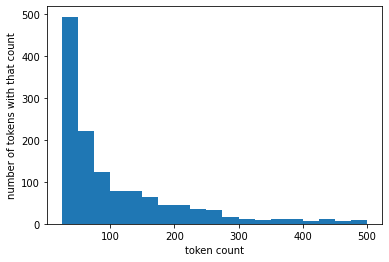

(5242, 1378)


[(0,
  '0.038*"wall" + 0.019*"great" + 0.017*"walk" + 0.012*"crowd" + 0.012*"bu" + 0.011*"section" + 0.011*"visit" + 0.010*"time" + 0.010*"china" + 0.010*"car"'),
 (1,
  '0.031*"wall" + 0.025*"walk" + 0.020*"great" + 0.018*"train" + 0.016*"mountain" + 0.012*"place" + 0.012*"bu" + 0.012*"cabl" + 0.011*"car" + 0.010*"back"'),
 (2,
  '0.042*"wall" + 0.024*"great" + 0.016*"climb" + 0.015*"crowd" + 0.014*"walk" + 0.012*"car" + 0.011*"time" + 0.011*"visit" + 0.011*"section" + 0.009*"hour"'),
 (3,
  '0.038*"wall" + 0.018*"day" + 0.017*"mountain" + 0.016*"walk" + 0.015*"great" + 0.013*"view" + 0.012*"car" + 0.011*"visit" + 0.010*"cabl" + 0.009*"peopl"'),
 (4,
  '0.028*"wall" + 0.026*"great" + 0.024*"walk" + 0.012*"car" + 0.012*"peopl" + 0.010*"visit" + 0.010*"mani" + 0.010*"cabl" + 0.010*"mountain" + 0.009*"view"'),
 (5,
  '0.037*"wall" + 0.020*"great" + 0.015*"walk" + 0.014*"crowd" + 0.013*"day" + 0.012*"hike" + 0.012*"peopl" + 0.011*"cabl" + 0.011*"view" + 0.011*"visit"'),
 (6,
  '0.040*"wal

In [15]:
  
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import numpy for matrix operation
import numpy as np

# Importing Gensim
import gensim
from gensim import corpora
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

!unzip -uq "/content/mallet-2.0.8.zip" -d "/content/"  
mallet_path = '/content/mallet-2.0.8/bin/mallet'
!unzip -uq "/content/reviews_dataset.zip/" -d "/content/" 
dirpath = '/content/reviews_dataset/'

import os
## Setup mallet environment change it according to your drive
os.environ.update({'MALLET_HOME':r'/content/mallet-2.0.8'})

# get all of the file names for the documents
import glob
paths = glob.glob("reviews_dataset/*")
## paths

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

from tqdm import tqdm
import collections
from scipy.sparse import csc_matrix
from gensim.matutils import Sparse2Corpus
import csv


corpus = []

with open('data_5241_claen_shuffled.csv', mode='r') as f:
    data = csv.reader(f)
    for rows in data:
      corpus += [rows[0]]

# stop loss words 
stop = set(stopwords.words('english'))

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())  
    return normalized

# clean data stored in a new list
data_lemmatized = [clean(doc).split() for doc in corpus] 

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Apply Preprocessing on the Corpus

import nltk

from pprint import pprint
import pandas as pd

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet


##########################################################################

## LDA Modeling

def compute_sparse_doc_vectors(document_paths):

    document_dicts = []
    tokens_doc = 0
    token2id = {}
    current_next_id = 0

    hw1_dataset = {}
    hw1_dataset = {'text':[], 'labels':[]}

    with open('data_5241_claen_shuffled.csv', mode='r') as f:
        data = csv.reader(f)
        ##label = {rows[0] for rows in data}
        for rows in data:
          hw1_dataset['labels'].append(rows[1])
          hw1_dataset['text'].append(rows[0])


          tokens = rows[0].split()
          tokens_doc += len(tokens)

          # map from token_id -> tf (count, binary, frequency, etc.)
          document_dict = collections.defaultdict(int)

          doc_length = len(tokens)

          ## doc_length = len(tokens)
          for token in tokens:
              if token not in token2id:
                  token2id[token] = current_next_id
                  current_next_id += 1
              token_id = token2id[token]
              document_dict[token_id] += 1

          document_dicts.append(document_dict)

    data = []
    rows = []
    cols = []
    for doc_id, document_dict in enumerate(document_dicts):
        for word_id, count in document_dict.items():
            data.append(count)
            rows.append(doc_id)
            cols.append(word_id)
    mat = csc_matrix((data, (rows, cols)))

    id2token = {id:tok for tok,id in token2id.items()}

    return mat, id2token

vectors, id2token = compute_sparse_doc_vectors(paths)
print(vectors.shape)
vectors

# sparse matrix representations
sparse_vectors, id2token = compute_sparse_doc_vectors(paths)
# check out how many stored elements we actually need
print('\n','dense matrix size:', sparse_vectors.shape[0] * sparse_vectors.shape[1])
sparse_vectors


word_counts = sparse_vectors.sum(axis=0)
print(word_counts.shape)
from matplotlib import pyplot as plt
bins = [25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500]
plt.hist(word_counts.tolist()[0], bins)
plt.xlabel("token count")
plt.ylabel("number of tokens with that count")
plt.show()

min_wordcount = 25
mask = np.where(word_counts>min_wordcount,1,0)
col_ids_to_keep = np.nonzero(mask)[1]
filtered_vectors = sparse_vectors[:,col_ids_to_keep]
print(filtered_vectors.shape)
filtered_tokens = [tok for id,tok in id2token.items() if id in col_ids_to_keep]
filtered_id2token = {id:tok for id,tok in enumerate(filtered_tokens)}

num_topics = 25
filtered_corpus = Sparse2Corpus(filtered_vectors, documents_columns=False)

##lda_v2 = LdaModel(corpus=filtered_corpus, id2word=filtered_id2token, num_topics=num_topics, passes=10)

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, 
                                                 corpus=filtered_corpus, 
                                                 num_topics=num_topics, 
                                                 ## alpha=1/num_topics,
                                                 alpha=50/num_topics,
                                                 id2word=filtered_id2token, 
                                                 ##workers=40,
                                                 ##optimize_interval=4,
                                                 iterations=5) 
                                                 ##iterations=1500)   
        
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
ldamallet.print_topics(num_topics=num_topics)



In [16]:
coherencemodel.get_coherence()

0.5443467605888967

In [18]:
from gensim.models import LdaModel

lda_v2 = LdaModel(corpus=filtered_corpus, id2word=filtered_id2token, num_topics=num_topics, passes=10)
lda_v2.print_topics(num_topics=num_topics)
coherencemodel = CoherenceModel(model=lda_v2, texts=texts, dictionary=id2word, coherence='c_v')

lda_v2.print_topics(num_topics=num_topics)

[(0,
  '0.029*"get" + 0.021*"go" + 0.019*"peopl" + 0.018*"time" + 0.018*"back" + 0.015*"train" + 0.015*"hour" + 0.014*"wait" + 0.013*"take" + 0.013*"would"'),
 (1,
  '0.075*"mountain" + 0.023*"beauti" + 0.023*"huangshan" + 0.016*"stay" + 0.014*"day" + 0.014*"view" + 0.014*"hotel" + 0.013*"hike" + 0.013*"see" + 0.012*"sceneri"'),
 (2,
  '0.030*"peak" + 0.027*"hotel" + 0.026*"hike" + 0.020*"mountain" + 0.018*"cabl" + 0.016*"car" + 0.015*"huangshan" + 0.014*"canyon" + 0.013*"day" + 0.012*"step"'),
 (3,
  '0.037*"bu" + 0.027*"rmb" + 0.019*"get" + 0.018*"car" + 0.017*"take" + 0.016*"mountain" + 0.016*"cabl" + 0.016*"hotel" + 0.013*"one" + 0.012*"hour"'),
 (4,
  '0.052*"side" + 0.033*"climb" + 0.033*"left" + 0.029*"wall" + 0.027*"crowd" + 0.026*"right" + 0.026*"steep" + 0.022*"less" + 0.021*"go" + 0.018*"way"'),
 (5,
  '0.080*"wall" + 0.031*"great" + 0.024*"badal" + 0.022*"visit" + 0.021*"part" + 0.021*"beij" + 0.017*"section" + 0.017*"tourist" + 0.015*"crowd" + 0.012*"peopl"'),
 (6,
  '0.03

In [19]:
coherencemodel.get_coherence()

0.40382951794369626

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 5214/5214 [00:22<00:00, 230.19it/s]


estimated vocab size using Heap's law: 30791.798015055894
actual vocab size: 19670
number of docs, vocab size: (5214, 19670)


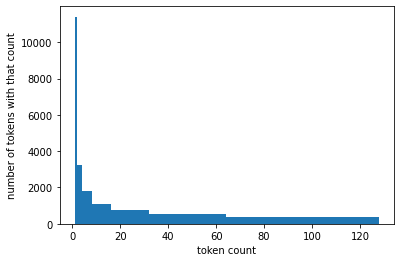

100%|██████████| 5214/5214 [00:13<00:00, 397.08it/s]


homogeneity: 0.17321828555723834
completeness: 0.9999999999999999
v-measure: 0.2952873948345693


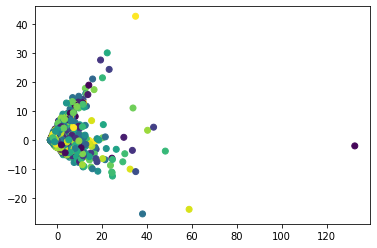

In [23]:
import collections
import numpy as np
from tqdm import tqdm
import math
from scipy.sparse import csc_matrix
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import numpy for matrix operation
import numpy as np

# Importing Gensim
import gensim
from gensim import corpora
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

import nltk
nltk.download('punkt')
nltk.download('stopwords')

import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
import re

# get all of the file names for the documents
import glob
paths = glob.glob("reviews_dataset/*")

!unzip -uq "/content/reviews_dataset.zip" -d "/content/" 

# document is a string containing 1 or more sentences
# returns a list of all of the tokens in the document
def tokenize(document, skip_header = True):
    doc_tokens = []

    # use nltk sentence tokenization
    sentences = nltk.sent_tokenize(document)
    for sentence in sentences:
        # use nltk word tokenization
        sent_tokens = nltk.word_tokenize(sentence)
        # remove punctuation
        sent_tokens = [word.translate(str.maketrans('', '', string.punctuation)) for word in sent_tokens]
        # lowercase and remove empty strings, stopwords, and numbers (all punctuation will become empty after previous line)
        sent_tokens = [word.lower() for word in sent_tokens if word]
        sent_tokens = ([word for word in sent_tokens if 
                            word not in stopwords 
                            #and word in vocab
                            and not re.search('\d+',word)
                            and len(word) > 2])
        # either use char ngrams or full words
        doc_tokens += sent_tokens
    return doc_tokens



# vector_type should be one of ['count','freq','binary','tfidf']
# Update 1: also return id2token: reverse map from col ids back to tokens
def compute_doc_vectors(document_paths, vector_type='count'):

    document_dicts = []

    # Now we need to make a vector based on these tokens
    # We don't know the full vocab yet (until we process everything)
    # So instead of doing a full pass over everything to compute that
    # Let's make a column_id for each new word we see and use a dict
    # then we can rely on that later to build the vectors without
    # processing the documents again (just need to check the dict objects)
    token2id = {}
    current_next_id = 0

    for doc_path in tqdm(document_paths):
        with open(doc_path,'r',encoding='latin-1') as document_handle:
            document = document_handle.read()
            tokens = tokenize(document)

            # map from token_id -> tf (count, binary, frequency, etc.)
            document_dict = collections.defaultdict(int)

            doc_length = len(tokens)
            for token in tokens:
                if token not in token2id:
                    token2id[token] = current_next_id
                    current_next_id += 1
                token_id = token2id[token]

                # let's just do all counts and transform afterwards
                #if vector_type == 'count':
                #    document_dict[token_id] += 1
                #elif vector_type == 'binary':
                #    document_dict[token_id] = 1
                #elif vector_type == "freq":
                #    document_dict[token_id] += 1/doc_length
                #elif vector_type == "tfidf":
                #    document_dict[token_id] += idf??????
                document_dict[token_id] += 1

            document_dicts.append(document_dict)

    vectors = []
    for document_dict in document_dicts:
        vector = [document_dict[token_id] for token_id in range(current_next_id)]
        vectors.append(vector)

    # convert to a 2d-array using numpy
    mat = np.array(vectors, dtype='float64')

    # e.g., we have something like this:
    #       word1 word2 word3 ... word N
    # doc1    0     2     0         1
    # doc2    1     0     0         0
    # doc3    0     0     2         3
    # ...

    # now we have rows = docs, cols = words
    # how can we transform this matrix to cover all types?
    if vector_type == 'count':
        # already in this format
        pass
    elif vector_type == 'binary':
        # I'll give this one:
        # set anything where condition is met to 1, else 0
        # (a bit inefficient since we didn't need to count everything if we
        # always knew we were going to do this, but just to be consistent with
        # the other methods, let's apply this here)
        mat = np.where(mat > 0, 1, 0)
    elif vector_type == "freq" or vector_type == "tfidf":
        # tip: np.sum(axis=0) will do column sum
        #      np.sum(axis=1) will do row sum 
        mat /= mat.sum(axis=1).reshape(-1,1)
        if vector_type == "tfidf":
            doc_freq = np.where(mat > 0, 1, 0).sum(axis=0)
            idf = np.log(1/doc_freq)
            mat *= idf

    id2token = {id:tok for tok,id in token2id.items()}

    return mat, id2token



## subset_paths = paths[::100]
## vectors, id2token = compute_doc_vectors(subset_paths, vector_type='tfidf')
## vectors, id2token = compute_doc_vectors(subset_paths, vector_type='count')
vectors, id2token = compute_doc_vectors(paths, vector_type='count')



total_tokens = vectors.sum()
# just pick some numbers in the middle of the ranges 10-100 and 0.4-0.6
est_V = 55 * total_tokens**0.5
print("estimated vocab size using Heap's law:",est_V)
print("actual vocab size:",vectors.shape[1])


print("number of docs, vocab size:",vectors.shape)
from matplotlib import pyplot as plt
bins = [1,2,4,8,16,32,64,128]
plt.hist(vectors.sum(axis=0), bins)
plt.xlabel("token count")
plt.ylabel("number of tokens with that count")
plt.show()


# run kmeans clustering with 20 clusters
# commenting out to skip for now
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
## vectors, id2token = compute_doc_vectors(subset_paths, vector_type='tfidf')
vectors, id2token = compute_doc_vectors(paths, vector_type='count')
#vectors, id2token = compute_doc_vectors(paths, vector_type='tfidf')
clustering = KMeans(n_clusters=20).fit(vectors)
## true_groups = [path.split('/')[1] for path in subset_paths]
true_groups = [path.split('/')[1] for path in paths]
# homogeneity: all points in a given cluster belong to same original group (0-1)
print("homogeneity:",homogeneity_score(true_groups, clustering.labels_))
# completeness: all points from an original group assigned to same cluster (0-1)
print("completeness:",completeness_score(true_groups, clustering.labels_))
# v-measure: harmonic mean of the two
print("v-measure:", v_measure_score(true_groups, clustering.labels_))


# visualize
from sklearn.decomposition import PCA
import numpy as np

# Use PCA to reduce to 2 dimensions 
pca = PCA(2)
 
#Transform the data
reduced_vectors = pca.fit_transform(vectors)
#print(reduced_vectors.shape)

label2int = {label:i for i,label in enumerate(set(true_groups))}
labels_as_ints = [label2int[g] for g in true_groups]
plt.scatter(reduced_vectors[:,0], reduced_vectors[:,1], c=labels_as_ints)



In [ ]:

vectors, id2token = compute_doc_vectors(paths, vector_type='binary')
#vectors, id2token = compute_doc_vectors(paths, vector_type='count')
clustering = KMeans(n_clusters=20).fit(vectors)
## true_groups = [path.split('/')[1] for path in subset_paths]
true_groups = [path.split('/')[1] for path in paths]
# homogeneity: all points in a given cluster belong to same original group (0-1)
print("homogeneity:",homogeneity_score(true_groups, clustering.labels_))
# completeness: all points from an original group assigned to same cluster (0-1)
print("completeness:",completeness_score(true_groups, clustering.labels_))
# v-measure: harmonic mean of the two
print("v-measure:", v_measure_score(true_groups, clustering.labels_))

#Transform the data
reduced_vectors = pca.fit_transform(vectors)
#print(reduced_vectors.shape)

label2int = {label:i for i,label in enumerate(set(true_groups))}
labels_as_ints = [label2int[g] for g in true_groups]
plt.scatter(reduced_vectors[:,0], reduced_vectors[:,1], c=labels_as_ints)



In [ ]:
# get the k features (tokens) with the highest likelihood for a given label
def get_top_k_nb_features(label, likelihoods, k):
    return sorted(likelihoods[label].items(),key=lambda x:x[1],reverse=True)[:k]

# try changing change 'es' to 'en or 'pt'
get_top_k_nb_features('1',lh3, 10)


In [ ]:
from tqdm import tqdm
import csv


hw1_dataset = {}

hw1_dataset = {'text':[], 'labels':[]}
with open('data_5241_claen_shuffled.csv', mode='r') as f:
    data = csv.reader(f)
    ##label = {rows[0] for rows in data}
    for rows in data:
      hw1_dataset['labels'].append(rows[1])
      hw1_dataset['text'].append(rows[0])

      
# take a list of words and get all character ngrams from the words and their counts
import collections
def get_char_ngrams(words, n=3, start_token="<s>", end_token="</s>"):
    counter = collections.defaultdict(int)
    for word in words:
        chars = [start_token] + list(word) + [end_token]
        for i in range(len(chars)-(n-1)):
            ngram = chars[i:i+n]
            counter[''.join(ngram)] += 1
    return counter

import nltk
nltk.download('punkt')
import string

import math
import collections
from tqdm import tqdm

def train_nb(training_data, tokenize_function):

    vocab = set()
    label_counts = {}
    label_word_counts = {}
    label_sum = collections.defaultdict(int)

    num_total_docs = len(training_data['labels'])
    # Update 0: added tqdm to make a progress bar
    for d in tqdm(range(num_total_docs)):
        document = training_data['text'][d]
        label = training_data['labels'][d]

        if label not in label_counts:
            label_counts[label] = 0
        if label not in label_word_counts:
            label_word_counts[label] = collections.defaultdict(int)

        tokens = tokenize_function(document)
        for token in tokens:
            label_word_counts[label][token] += 1
            vocab.add(token)
            label_sum[label] += 1

        label_counts[label] += 1

    # keys are labels, values are the log priors
    log_priors = {}
    for label, count in label_counts.items():
        log_priors[label] = math.log(count / num_total_docs)
    # keys are labels, values are dictionaries mapping words to their 
    #                   likelihoods for that label
    log_likelihoods = {}
    for label, word_count in label_word_counts.items():
        log_likelihoods[label] = {}

        for word in vocab:
            log_likelihoods[label][word] = math.log((word_count[word] + 1) / (label_sum[label] + len(vocab)))


    return log_priors, log_likelihoods, vocab

# test sentences
##train_nb({'text':['this is an okay sentence','this is a bad sentence'],'labels':['neutral','bad']}, tokenize)
train_nb(hw1_dataset, tokenize)

prior, lh, v = train_nb(hw1_dataset, tokenize)

# get the k features (tokens) with the highest likelihood for a given label
def get_top_k_nb_features(label, likelihoods, k):
    return sorted(likelihoods[label].items(),key=lambda x:x[1],reverse=True)[:k]

# try changing change 'es' to 'en or 'pt'
get_top_k_nb_features('1',lh, 10)


full_word_tokenize = lambda document: tokenize(document, char_ngrams=None)
prior3, lh3, v3 = train_nb(hw1_dataset, full_word_tokenize)
##preds3 = my_test_nb(hw1_dataset['test'], prior3, lh3, v3, full_word_tokenize)

print(lh3)

In [ ]:
# get the k features (tokens) with the highest likelihood for a given label
def get_top_k_nb_features(label, likelihoods, k):
    return sorted(likelihoods[label].items(),key=lambda x:x[1],reverse=True)[:k]

# try changing change 'es' to 'en or 'pt'
get_top_k_nb_features('1',lh3, 10)


In [ ]:

# try changing change 'es' to 'en or 'pt'
get_top_k_nb_features('0',lh3, 10)
